<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Julia_Quantum_Optics_%2B_Potential_Barrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Julia in Google Colab to visualize the propagation of a Gaussian wave packet running into a potential barrier.

In [2]:
using Pkg

In [ ]:
] add QuantumOptics PyPlot

In [5]:
using QuantumOptics
using PyPlot

In [6]:
xmin = -30
xmax = 30
Npoints = 200

b_position = PositionBasis(xmin, xmax, Npoints)
b_momentum = MomentumBasis(b_position)

Momentum(pmin=-10.471975511965978, pmax=10.471975511965978, N=200)

In [7]:
V0 = 1. # Height of Barrier
d = 5 # Width of Barrier
function V_barrier(x)
    if x < -d/2 || x > d/2
        return 0.
    else
        return V0
    end
end
V = potentialoperator(b_position, V_barrier)

Operator(dim=200x200)
  basis: Position(xmin=-30, xmax=30, N=200)sparse([93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 200, 200)

In [8]:
Txp = transform(b_position, b_momentum)
Tpx = transform(b_momentum, b_position)
Hkin = LazyProduct(Txp, momentum(b_momentum)^2/2, Tpx)

LazyProduct(dim=200x200)
  basis: Position(xmin=-30, xmax=30, N=200)
  operators: 3

In [9]:
H = LazySum(Hkin, V)

LazySum(dim=200x200)
  basis: Position(xmin=-30, xmax=30, N=200)
  operators: 2

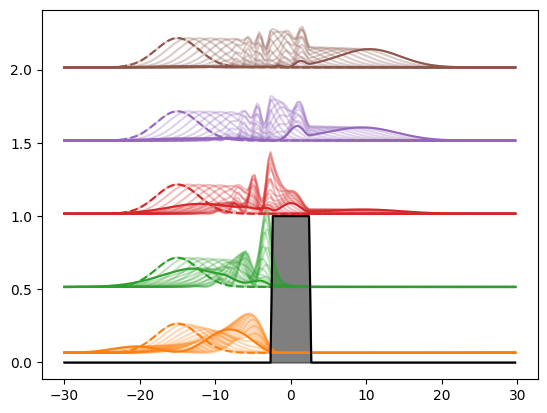

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x78cc3cf99050>

In [10]:
xpoints = samplepoints(b_position)

x0 = -15
sigma0 = 4
p0vec = [sqrt(0.1), 1, sqrt(2), sqrt(3), 2]
timecuts = 20

for i_p in 1:length(p0vec)
    p0 = p0vec[i_p]
    Ψ₀ = gaussianstate(b_position, x0, p0, sigma0)
    scaling = 1.0/maximum(abs.(Ψ₀.data))^2/5
    n0 = abs.(Ψ₀.data).^2 .* scaling

    tmax = 2*abs(x0)/(p0+0.2)
    T = collect(range(0.0, stop=tmax, length=timecuts))
    tout, Ψt = timeevolution.schroedinger(T, Ψ₀, H);

    offset = real.(expect(Hkin, Ψ₀))
    plot(xpoints, n0.+offset, "C$i_p--")
    for i=1:length(T)
        Ψ = Ψt[i]
        n = abs.(Ψ.data).^2 .* scaling
        plot(xpoints, n.+offset, "C$i_p", alpha=0.3)
    end
    nt = abs.(Ψt[timecuts].data).^2*scaling
    plot(xpoints, nt.+offset, "C$i_p")
end
y = V_barrier.(xpoints)
fill_between(xpoints, 0, y, color="k", alpha=0.5);
plot(xpoints, y, "k")